
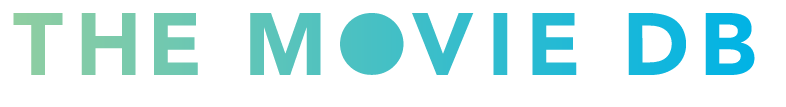

# Project: Investigate the TMDb Movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='Introduction'></a>
# Introduction

This dataset contains information about 10,000 movies collected from The Movie Database (TMDb). TMDb is a community-built movie and TV database, where data has been provided by the internet community dating back to 2008. This report will analyze the movie data for trends and answer questions like:
* Which genres are most prevalent from year to year?
* What kinds of properties are associated with movies that have high revenues?
* Which directors and actors are associated with high ratings?
* Which Production companies have made the highest profit?


The dependent variable is "dependent" on the independent variable. As the experimenter changes the independent variable, the change in the dependent variable is observed and recorded. When you take data in an experiment, the dependent variable is the one being measured. 

<a id=' Data Wrangling.'></a>
# Data Wrangling

In this section of the report:
* Load in the data
* Check for cleanliness,
* Trim and clean your dataset for analysis. 


In [530]:
#Load and Clean the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
# reading the movie dataframe
df = pd.read_csv('tmdb-movies.csv')
# look at the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [531]:
# prints out first lines to inspect data  
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [532]:

df1 = df[['release_year','genres']]
#print(df1)
df2 = df1.query('release_year==1966')
count = df2.count()
print('count',count[0])

#print(df2)

count 46


In [533]:
#Examine info about the data types in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [534]:
# this returns a tuple of the dimensions of the dataframe
df.shape

(10866, 21)

In [535]:
#Check Columns for 0 values
df.isin([0]).sum()

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [536]:
# this returns the number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [537]:
# check for duplicates in the data
sum(df.duplicated())

1

<a id=' Cleaning Decisions based on Data Wrangling.'></a>
# Cleaning Decisions based on Data Wrangling

* Drop duplicates rows.
* Drop irrelevant columns;
    * homepage
    * imdb_id 
    * tagline 
    * overview
    * budget_adj
    * revenue_adj
* Drop the null values columns where numbers are low; 
    * cast
    * director
    * genres
* To preserve data integrity, do not drop the columns where null values are high, to avoid dropping too much data. 
* Replace zero values with mean for the high zero value columns;
    * budget 
    * revenue
* Drop the zero values columns where numbers are low; 
    * runtime.

<a id=' Data Cleaning.'></a>
# Data Cleaning

In [538]:
# budgets of zero must be missing values
df_clean=df.query('budget>0').copy()

In [539]:
#Check Columns for 0 values
df_clean.isin([0]).sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                 1315
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                    3
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj             1315
dtype: int64

In [540]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Drop columns with no value

df.drop(df.columns[[1, 7, 9, 11, 19, 20]], axis = 1, inplace = True)

In [541]:
# Verify the columns are dropped.
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [542]:
#drop the null values with low occurance 
nullVals = ['cast', 'director', 'genres']
df.dropna(subset = nullVals, how='any', inplace=True)

In [543]:
# verify null values have been dropped.
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
keywords                1425
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

<a id=' Exploratory Data Analysis.'></a>
# Exploratory Data Analysis

<a id='  Question 1: Trend of movies released over the dataset time period.'></a>
## Question 1: Trend of movies released over the dataset time period

In [544]:
movies_count = df.groupby('release_year').count()['id']
movies_count.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

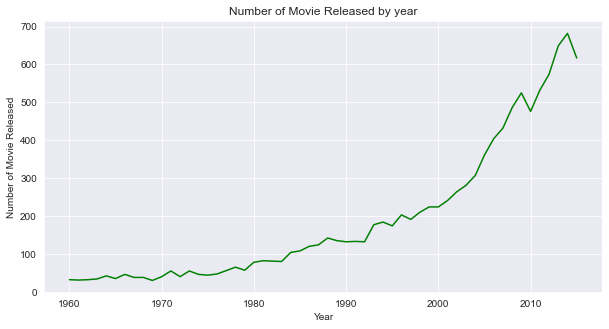

In [545]:
#set style
sns.set_style('darkgrid')
#set x, y axis data
# x is movie release year
x = movies_count.index
# y is number of movie released
y = movies_count
#set size
plt.figure(figsize=(10, 5))
#plot line chart 
plt.plot(x, y, color = 'g', label = 'mean')
#set title and labels
plt.title('Number of Movie Released by year')
plt.xlabel('Year')
plt.ylabel('Number of Movie Released');

A line graph was the best choice to display a trend for a single value over time.
I wanted to explore this variable, to show trends for movies created each year, decade.
I was surprised how much movie production has increased. Since the year 2000, movie production has sky rocketed. from 200 to 700.

<a id=' Question 2: Popular Trends by Generation.'></a>
# Question 2: Popular Trends by Generation

In [546]:
# sort the movies by release year.
release_year= df.release_year.unique()
release_year= np.sort(release_year)
release_year

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015])

In [547]:
# Segment the years into decades.
# 1960s
decade1960s =release_year[:10]
# 1970s
decade1970s =release_year[10:20]
# 1980s
decade1980s =release_year[20:30]
# 1990s
decade1990s = release_year[30:40]
# 2000s
decade2000 = release_year[40:]

In [548]:
df_clean['budget'] = df_clean['budget'].fillna(df_clean['budget'].mean())
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
keywords                1425
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

<a id='Function to Calculate top values.'></a>
# Function to Calculate top values

In [549]:
# split string by pipe & count number of occurences
#argument:dataframe_col is the target dataframe & column; num is the number of the top factor
def find_top(dataframe_col, num=1):
    # split the characters in the input column & make it a list
    sep_col = dataframe_col.str.cat(sep='|').split('|')
    #save it to a dataframe
    new = pd.DataFrame({'top' :sep_col})
    #count their number of appeared times
    top = new['top'].value_counts().head(num)
    return top

<a id='Calculate Top Keywords by Decade.'></a>
# Calculate Top Keywords by Decade

In [550]:
# List of Decades
decades = [decade1960s, decade1970s, decade1980s, decade1990s, decade2000]
#Decade names
names = ['1960s', '1970s', '1980s', '1990s', 'after2000']
#creat a empty dataframe.
df_keywords = pd.DataFrame()
index = 0
#iterate years per decade
for i in decades:
    #Filter the data frame for each year
    df_year = df[df.release_year.isin(i)] 
    #Use the find_top function to find the top keyword per year 
    df_year_top = pd.DataFrame({'year' :names[index],'top': find_top(df_year.keywords,1)})
     #append dfn2 to df_q2
    df_keywords = df_keywords.append(df_year_top)
    index +=1
df_keywords

,year,top
based on novel,1960s,16
based on novel,1970s,23
nudity,1980s,39
independent film,1990s,80
woman director,after2000,350


<a id='Visualise Top Genres by Decade.'></a>
# Visualise Top Genres by Decade

Text(0.5, 1.0, 'Genres Popularity Trends by Generation')

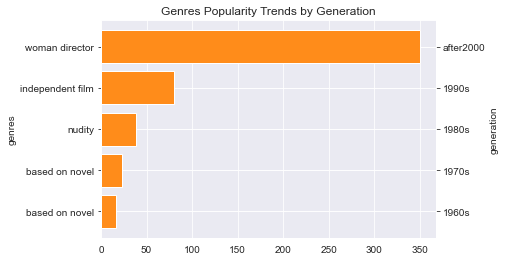

In [551]:
# Setting the positions
generation = ['1960s', '1970s', '1980s', '1990s', 'after2000']
genres = df_keywords.index
y_pos = np.arange(len(generation))
fig, ax = plt.subplots()
# Setting y1: the genre number
y1 = df_keywords.top
# Setting y2 again to present the right-side y axis labels
y2 = df_keywords.top
#plot the bar
ax.barh(y_pos,y1, color = '#ff8c1a')
#set the left side y axis ticks position
ax.set_yticks(y_pos)
#set the left side y axis tick label
ax.set_yticklabels(genres)
#set left side y axis label
ax.set_ylabel('genres')

#create another axis to present the right-side y axis labels
ax2 = ax.twinx()
#plot the bar
ax2.barh(y_pos,y2, color = '#ff8c1a')
#set the right side y axis ticks position
ax2.set_yticks(y_pos)
#set the right side y axis tick label
ax2.set_yticklabels(generation)
#set right side y axis label
ax2.set_ylabel('generation')
#set title
ax.set_title('Genres Popularity Trends by Generation')

A bar chart graph was the best choice to plot the count of genres for 5 decade values 
I wanted to explore this variable to see what keyword trends indicated what in these movies was popular.
The keyword woman director is the largest, yet the most popular dierctor  of the 2000's decade is not a woman. I verified this in the data, that keywords of containing 'woman director' did in fact have a woman director.

Also the keyword 'Independant film' was frequent,even though the big production companies, Warner bros and MCM are most popular.

<a id='Calculate Top Cast by Decade.'></a>
# Calculate Top Cast by Decade

In [552]:
# List of Decades
decades = [decade1960s, decade1970s, decade1980s, decade1990s, decade2000]
#Decade names
names = ['1960s', '1970s', '1980s', '1990s', 'after2000']
#creat a empty dataframe.
df_cast = pd.DataFrame()
index = 0
#iterate years per decade
for i in decades:
    #Filter the data frame for each year
    df_year = df[df.release_year.isin(i)] 
    #Use the find_top function to find the top keyword per year 
    df_year_top = pd.DataFrame({'year' :names[index],'top': find_top(df_year.cast,1)})
     #append dfn2 to df_q2
    df_cast = df_cast.append(df_year_top)
    index +=1
df_cast

,year,top
John Wayne,1960s,13
Clint Eastwood,1970s,15
Dan Aykroyd,1980s,13
Bruce Willis,1990s,25
Samuel L. Jackson,after2000,49


<a id='Visualise Top Cast by Decade.'></a>
# Visualise Top Cast by Decade

Text(0.5, 1.0, 'Cast Popularity Trends by Generation')

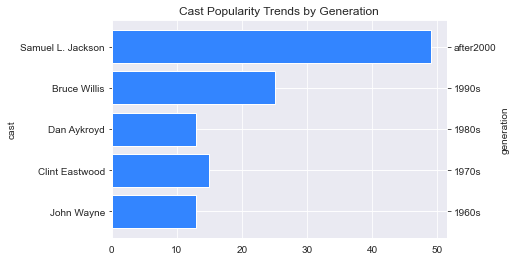

In [553]:
# Setting the positions
generation = ['1960s', '1970s', '1980s', '1990s', 'after2000']
cast = df_cast.index
y_pos = np.arange(len(generation))
fig, ax = plt.subplots()
# Setting y1: the genre number
y1 = df_cast.top
# Setting y2 again to present the right-side y axis labels
y2 = df_cast.top
#plot the bar
ax.barh(y_pos,y1, color = '#3385ff')
#set the left side y axis ticks position
ax.set_yticks(y_pos)
#set the left side y axis tick label
ax.set_yticklabels(cast)
#set left side y axis label
ax.set_ylabel('cast')

#create another axis to present the right-side y axis labels
ax2 = ax.twinx()
#plot the bar
ax2.barh(y_pos,y2, color = '#3385ff')
#set the right side y axis ticks position
ax2.set_yticks(y_pos)
#set the right side y axis tick label
ax2.set_yticklabels(generation)
#set right side y axis label
ax2.set_ylabel('generation')
#set title
ax.set_title('Cast Popularity Trends by Generation')

A bar chart graph was the best choice to plot the count of genres for 5 decade values 

No major suprises here with the actors who were most popular in the corresponding decades. All were popular stars of their time.


<a id='Calculate Top Directors by Decade.'></a>
# Calculate Top Directors by Decade

In [554]:
# List of Decades
decades = [decade1960s, decade1970s, decade1980s, decade1990s, decade2000]
#Decade names
names = ['1960s', '1970s', '1980s', '1990s', 'after2000']
#creat a empty dataframe.
df_directors = pd.DataFrame()
index = 0
#iterate years per decade
for i in decades:
    #Filter the data frame for each year
    df_year = df[df.release_year.isin(i)] 
    #Use the find_top function to find the top keyword per year 
    df_year_top = pd.DataFrame({'year' :names[index],'top': find_top(df_year.director,1)})
     #append dfn2 to df_q2
    df_directors = df_directors.append(df_year_top)
    index +=1
df_directors

,year,top
Roger Corman,1960s,11
Woody Allen,1970s,7
Woody Allen,1980s,11
Woody Allen,1990s,10
Steven Soderbergh,after2000,19


<a id='Visualise Top Directors by Decade.'></a>
# Visualise Top Directors by Decade

Text(0.5, 1.0, 'Directors Popularity Trends by Generation')

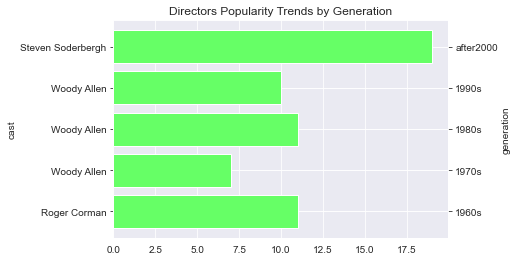

In [555]:
# Setting the positions
generation = ['1960s', '1970s', '1980s', '1990s', 'after2000']
directors = df_directors.index
y_pos = np.arange(len(generation))
fig, ax = plt.subplots()
# Setting y1: the genre number
y1 = df_directors.top
# Setting y2 again to present the right-side y axis labels
y2 = df_directors.top
#plot the bar
ax.barh(y_pos,y1, color = '#66ff66')
#set the left side y axis ticks position
ax.set_yticks(y_pos)
#set the left side y axis tick label
ax.set_yticklabels(directors)
#set left side y axis label
ax.set_ylabel('cast')

#create another axis to present the right-side y axis labels
ax2 = ax.twinx()
#plot the bar
ax2.barh(y_pos,y2, color = '#66ff66')
#set the right side y axis ticks position
ax2.set_yticks(y_pos)
#set the right side y axis tick label
ax2.set_yticklabels(generation)
#set right side y axis label
ax2.set_ylabel('generation')
#set title
ax.set_title('Directors Popularity Trends by Generation')

A bar chart graph was the best choice to plot the count of genres for 5 decade values 
I was suprised here, not to see Stephen Speilberg or James Cameron, or more better known directors.
It can be seen that Woody Allen dominated from the 1970's to the 1990s, which also suprised me. I did not think he was as successful as the figues show.

<a id='Calculate Top Production Company by Decade.'></a>
# Calculate Top Production Company by Decade

In [556]:
# List of Decades
decades = [decade1960s, decade1970s, decade1980s, decade1990s, decade2000]
#Decade names
names = ['1960s', '1970s', '1980s', '1990s', 'after2000']
#creat a empty dataframe.
df_production_companies = pd.DataFrame()
index = 0
#iterate years per decade
for i in decades:
    #Filter the data frame for each year
    df_year = df[df.release_year.isin(i)] 
    #Use the find_top function to find the top keyword per year 
    df_year_top = pd.DataFrame({'year' :names[index],'top': find_top(df_year.production_companies,1)})
     #append dfn2 to df_q2
    df_production_companies = df_production_companies.append(df_year_top)
    index +=1
df_production_companies



,year,top
Metro-Goldwyn-Mayer (MGM),1960s,31
Universal Pictures,1970s,45
Paramount Pictures,1980s,86
Warner Bros.,1990s,153
Universal Pictures,after2000,234


<a id='Visualise Top Production Company by Decade.'></a>
# Visualise Top Production Company by Decade

Text(0.5, 1.0, 'Production Companies Popularity Trends by Generation')

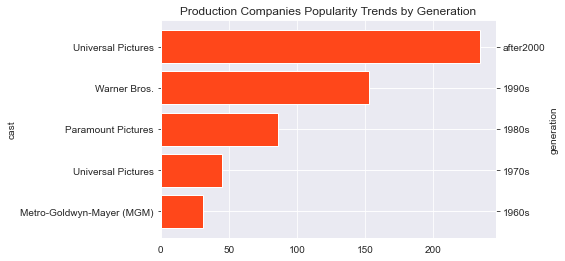

In [557]:
# Setting the positions
generation = ['1960s', '1970s', '1980s', '1990s', 'after2000']
production_companies = df_production_companies.index
y_pos = np.arange(len(generation))
fig, ax = plt.subplots()
# Setting y1: the genre number
y1 = df_production_companies.top
# Setting y2 again to present the right-side y axis labels
y2 = df_production_companies.top
#plot the bar
ax.barh(y_pos,y1, color = '#ff471a')
#set the left side y axis ticks position
ax.set_yticks(y_pos)
#set the left side y axis tick label
ax.set_yticklabels(production_companies)
#set left side y axis label
ax.set_ylabel('cast')

#create another axis to present the right-side y axis labels
ax2 = ax.twinx()
#plot the bar
ax2.barh(y_pos,y2, color = '#ff471a')
#set the right side y axis ticks position
ax2.set_yticks(y_pos)
#set the right side y axis tick label
ax2.set_yticklabels(generation)
#set right side y axis label
ax2.set_ylabel('generation')
#set title
ax.set_title('Production Companies Popularity Trends by Generation')

A bar chart graph was the best choice to plot the count of genres for 5 decade values.
It can be seen from the graph results that the big production companies dominate the movie industry and create the most popular movies. Most likely because they have the largest budgets and most famous casts.

<a id='Question 3 - Is popularity linked to higher movie budgets and revenues.'></a>
# Question 3 - Is popularity linked to higher movie budgets and revenues.

<a id='Calculate Budgets interals, Low, Medium and High.'></a>
# Calculate Budgets interals, Low, Medium and High

In [558]:
# see the budget breakdown
df_clean['budget'].describe()

count    5.170000e+03
mean     3.073943e+07
std      3.890065e+07
min      1.000000e+00
25%      6.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [559]:
# use .loc[] to select the rows I want
df_clean['budget'].describe().loc[['min','50%','75%','max']]

min            1.0
50%     17000000.0
75%     40000000.0
max    425000000.0
Name: budget, dtype: float64

In [560]:
# List of Intervals
budget_intervals = df_clean['budget'].describe().loc[['min','50%','75%','max']].values
# List of labels
budget_labels = ['Low','Moderate','High']
print('budget intervals are', budget_intervals, '\nLabels are', budget_labels)

budget intervals are [1.00e+00 1.70e+07 4.00e+07 4.25e+08] 
Labels are ['Low', 'Moderate', 'High']


In [561]:
# create new variable using pd.cut()
df_clean['Budget Intervals']=pd.cut(df_clean['budget'],
                                   bins=budget_intervals,
                                   labels=budget_labels,
                                   include_lowest=True)
# Check
df_clean['Budget Intervals'].value_counts().sort_index()

Low         2590
Moderate    1381
High        1199
Name: Budget Intervals, dtype: int64

In [562]:
df_clean[['Budget Intervals','budget']]

,Budget Intervals,budget
0,High,150000000
1,High,150000000
2,High,110000000
3,High,200000000
4,High,190000000
...,...,...
10835,Low,12000000
10841,Low,75000
10848,Low,5115000
10855,Low,700000


<a id='Visualise Budget against Popularity'></a>
# Visualise Budget against Popularity

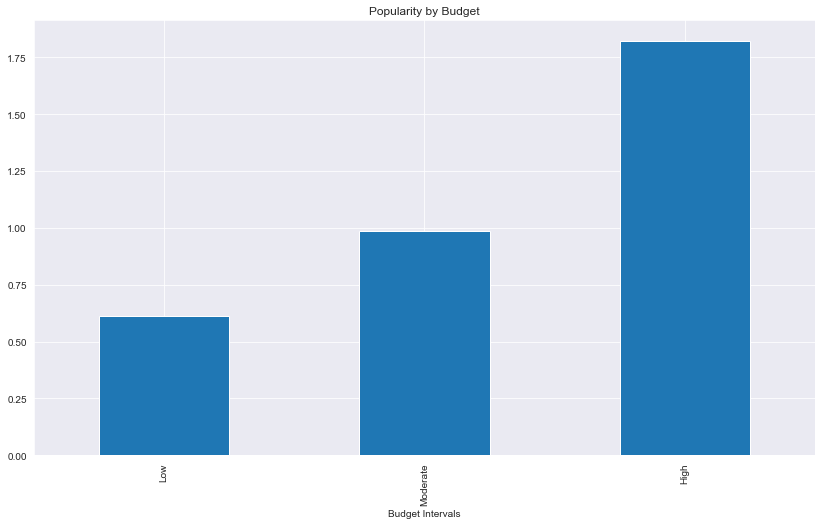

In [579]:
df_clean.groupby(['Budget Intervals'])['popularity'].mean().plot.bar(figsize=[14,8],title='Popularity by Budget');

A bar chart graph was the best choice to plot the count of budgets for the 3 quantised labels by popularity.
I wanted to explore this variable to see if higher budgets were directly linked to higher popularity scores.
No surprises here, that high budget moves are the most popular.

In [564]:
df_clean.groupby(['Budget Intervals','release_year'])['popularity'].mean()

Budget Intervals  release_year
Low               1960            0.890063
                  1961            0.650838
                  1962            0.672336
                  1963            0.702942
                  1964            0.921256
                                    ...   
High              2011            1.810899
                  2012            2.351899
                  2013            2.219438
                  2014            4.123857
                  2015            5.453505
Name: popularity, Length: 168, dtype: float64

In [565]:
df_clean.groupby(['Budget Intervals','release_year'])['popularity'].mean().unstack('Budget Intervals').head()

Budget Intervals,Low,Moderate,High
release_year,,,
1960,0.890063,NaN,NaN
1961,0.650838,NaN,NaN
1962,0.672336,NaN,NaN
1963,0.702942,0.804533,NaN
1964,0.921256,NaN,NaN


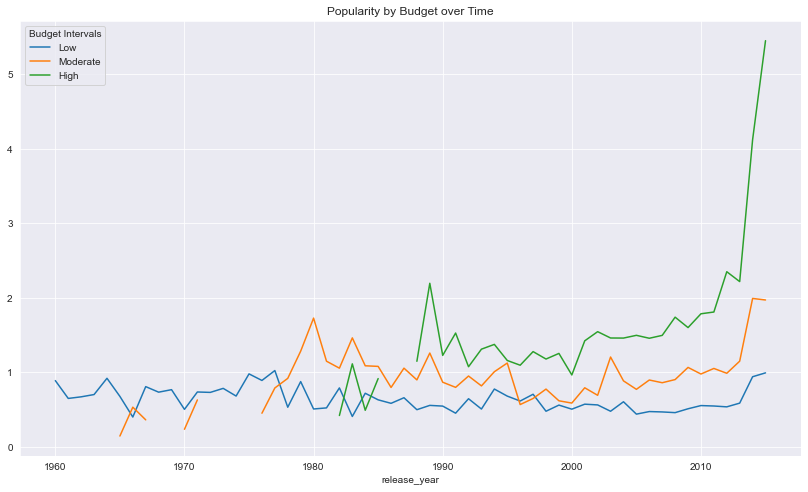

In [578]:
#plot
# 1. Years on the x axis ( as they are the rows)
# 2. Budget intervals are te hue variable (as they are the columns)
df_clean.groupby(['Budget Intervals','release_year'])['popularity'].mean().unstack('Budget Intervals').plot(figsize=[14,8],title='Popularity by Budget over Time');

A line graph was the best choice to plot the popularity by budget over time.
It can be seen that seen that up to 2010, large budgets weren't adversely affecting popularity, but after 2010, we can see high budgets and popularity sky rocket.

In [567]:
# see the budget breakdown
df_clean['popularity'].describe()

count    5170.000000
mean        0.992323
std         1.329145
min         0.001117
25%         0.348024
50%         0.623921
75%         1.152401
max        32.985763
Name: popularity, dtype: float64

In [568]:
# use .loc[] to select the rows I want
df_clean['popularity'].describe().loc[['min','50%','75%','max']]

min     0.001117
50%     0.623921
75%     1.152401
max    32.985763
Name: popularity, dtype: float64

In [569]:
# List of Intervals
popularity_intervals = df_clean['popularity'].describe().loc[['min','50%','75%','max']].values
# List of labels
popularity_labels = ['Low','Moderate','High']
print('popularity intervals are', popularity_intervals, '\nLabels are', popularity_labels)

popularity intervals are [1.11700000e-03 6.23921000e-01 1.15240125e+00 3.29857630e+01] 
Labels are ['Low', 'Moderate', 'High']


In [570]:
# create new variable using pd.cut()
df_clean['Popularity Intervals']=pd.cut(df_clean['popularity'],
                                   bins=popularity_intervals,
                                   labels=popularity_labels,
                                   include_lowest=True)
# Check
df_clean['Popularity Intervals'].value_counts().sort_index()

Low         2585
Moderate    1292
High        1293
Name: Popularity Intervals, dtype: int64

In [571]:
df_clean[['Popularity Intervals','popularity']]

,Popularity Intervals,popularity
0,High,32.985763
1,High,28.419936
2,High,13.112507
3,High,11.173104
4,High,9.335014
...,...,...
10835,Low,0.299911
10841,Low,0.264925
10848,Low,0.207257
10855,Low,0.141026


<a id='Visualise Revenue against Popularity'></a>
# Visualise Revenue against Popularity

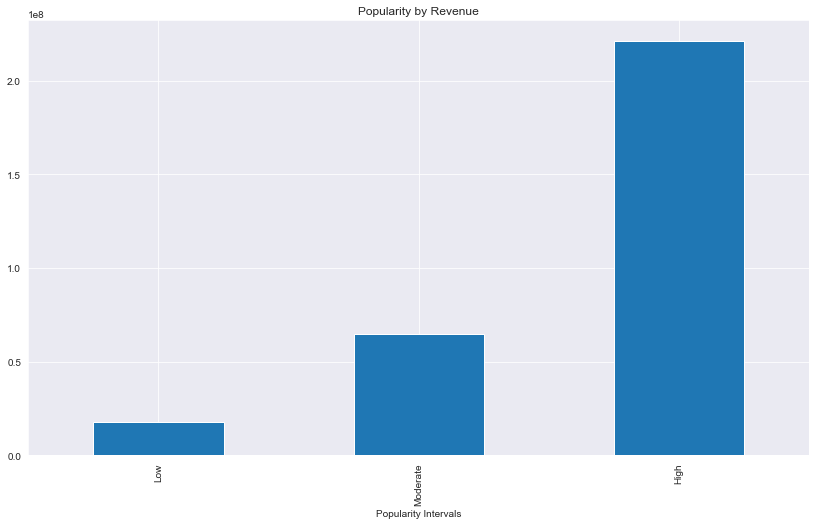

In [576]:
df_clean.groupby(['Popularity Intervals'])['revenue'].mean().plot.bar(figsize=[14,8],title='Popularity by Revenue');

A bar chart graph was the best choice to plot the count of revenue for the 3 quantised labels by popularity.
I wanted to explore this variable to see if higher revenues, were made from popular movies.
No surprises here, that popular movies, have high revenues.

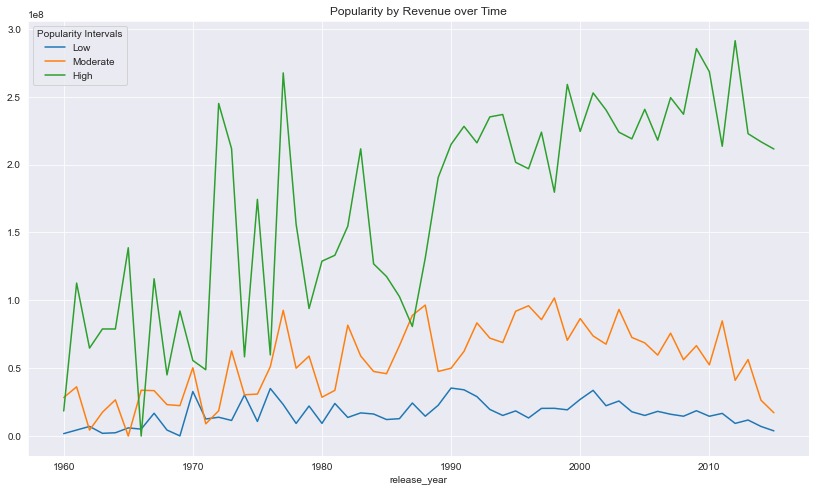

In [577]:
df_clean.groupby(['Popularity Intervals','release_year'])['revenue'].mean().unstack('Popularity Intervals').plot(figsize=[14,8],title='Popularity by Revenue over Time');

A line graph was the best choice to plot the popularity by revenue over time.
It can be seen that seen that up to the late 1980s it can be seen that revenue from popular movies jumpede and remained high.

<a id='conclusions'></a>
# Conclusions



In the first question, I examined how many movies are created each year and it can be seen comparing the 1960s to the 2000's onwards, there is a huge increase in movie production. For example in the 1960's less than an average of 50 movies per year, but in the 2000's the average has increased to almost 700 movies per year, which shows the huge growth in the movie industry and popularity of movies as a whole.

In question 2, I examined trends over the decades.

Questions are asked were for each decade were:

1. What was the most popular keyword associated with movies?


| **keywords**| **year**| **top**
|-|-|-|
|based on novel|	1960s|	16
|based on novel	|1970s|	23
|nudity	|1980s	|39
|independent film|	1990s|	80
|woman director|	after2000|	350


2. Who were the most popular actors/actresses?

| **Cast**|	**year**|**top**
|-|-|-|
|John Wayne	|1960s	|13
|Clint Eastwood	|1970s|	15
|Dan Aykroyd	|1980s|	13
|Bruce Willis	|1990s	|25
|Samuel L. Jackson|	after2000	|49

3. Who were the most popular directors?

|**Directors** |**year**|**top**
|-|-|-|
|Roger Corman	|1960s|	11
|Woody Allen	|1970s|	7
|Woody Allen	|1980s|	11
|Woody Allen	|1990s|	10
|Steven Soderbergh|	after2000|	19

4. Who were the most popular production companies?


|**Production Companies**|**year**|**top**
|-|-|-|
|Metro-Goldwyn-Mayer (MGM)|1960s|	31
|Universal Pictures|1970s|	45
|Paramount Pictures	|1980s|	86
|Warner Bros.	|1990s	|153
|Universal Pictures	|after2000|	234

In Question 3, I asked examined was movie popularity, related to budget.
From the graphs it can be seen that this is a direct link between popularity and budgets.
High budgets, have high popularity and also high revenue.

Examining budget and revenue, over the decades, it can be seen that since 2010, there has been a huge spike in movie budgets and revenue made from  movies. Since that time Warner Bros and Universal are associate with the most popular movies.

It's no suprise, that big actors, budgets and production companies have huge budgets, which need to make large revenue to make profits.

That is today's movie industry.

# Limitations


    * Data quality: I had to make assumptions about zero values in the data. For example, I assumed that zero budget values were missing, which may be inaccurate. I dropped the null values columns where numbers are low on the cast, director and genres columns, but to preserve data integrity, I do not drop the columns where null values are high, to avoid dropping too much data. I replaced zero values with the mean for the high zero value columns, which again, might alter results.

    * Quantising the data
    For the graphs I created related to popularity and budget, I quantised the data into Low, Medium and Hign, to make it easier to graph.
    This was calculated on Max, Min values, but outliers in the data may have impacted this.

    * Other than that, after cleaning and assumptions that were made, I did not find any timitations wit the data.




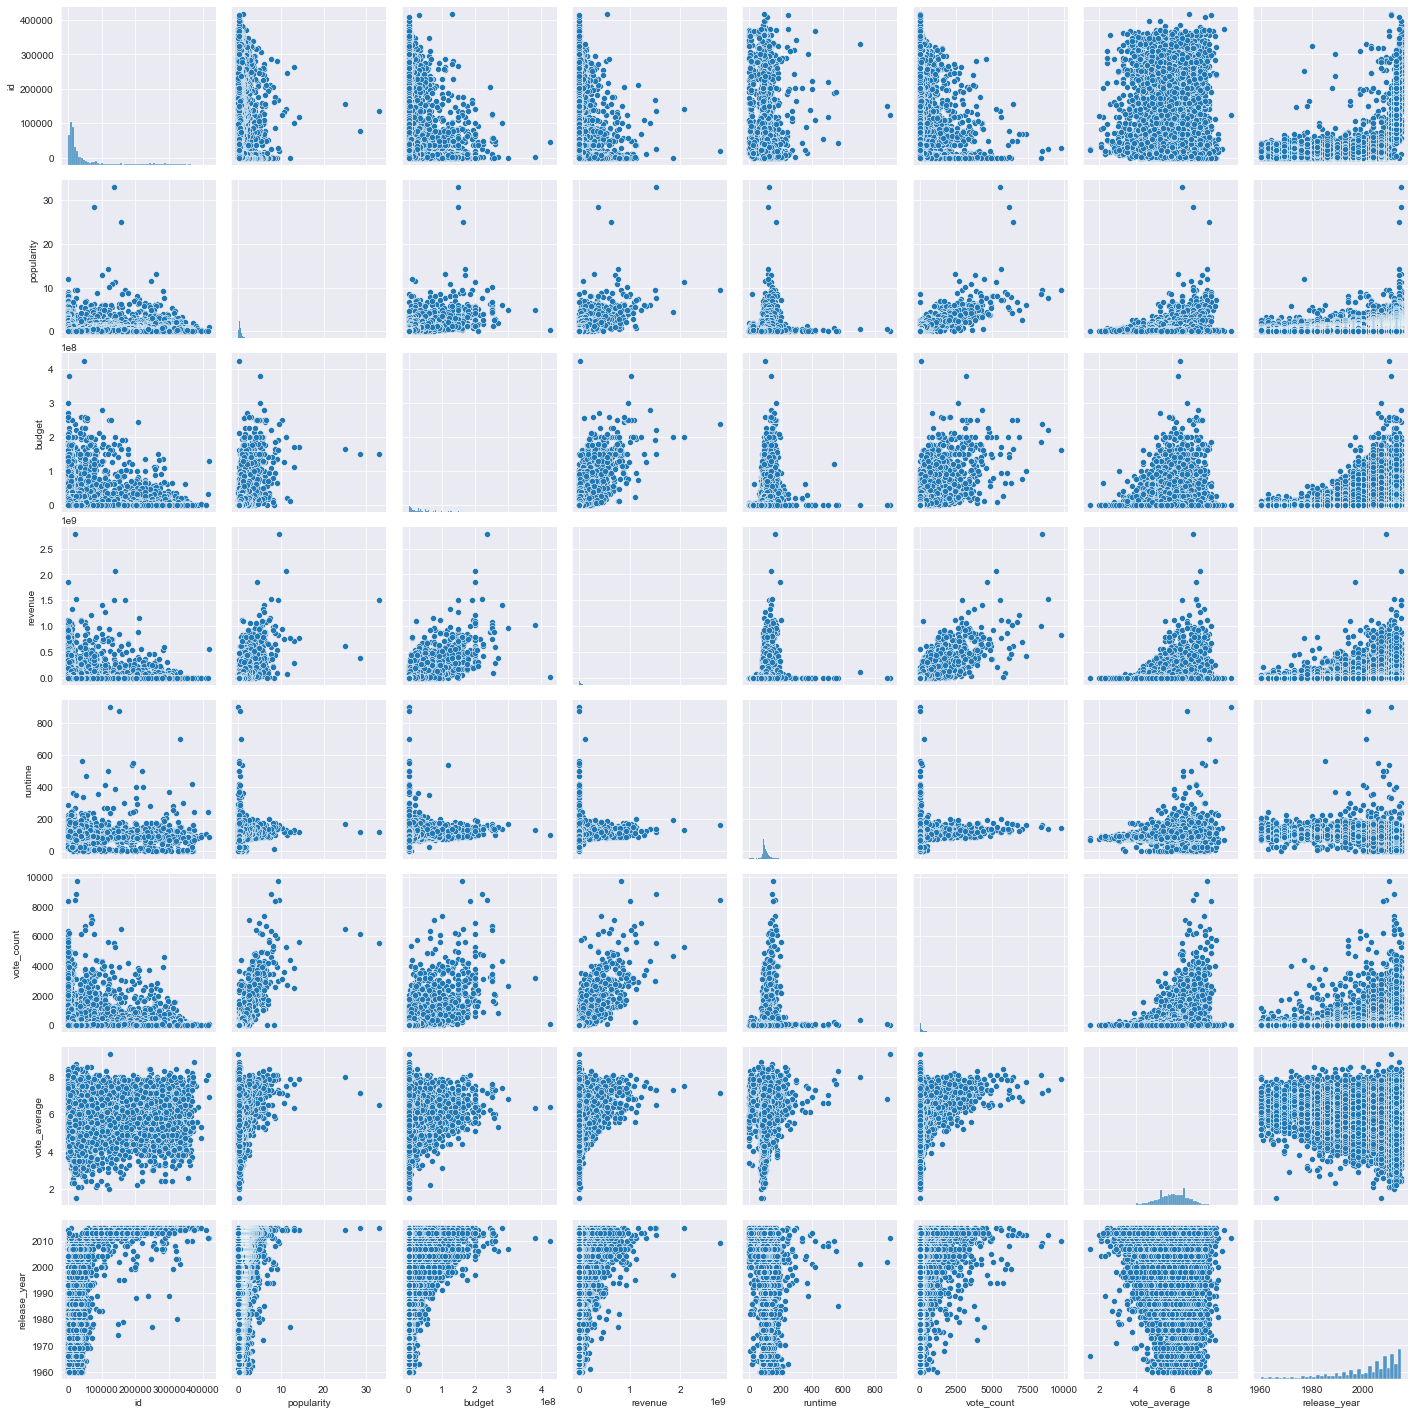

In [574]:
sns.pairplot(df);
# The Data has Outliers

* Except for the vote_average columns, all columns are skewed to the left. Release year is skewed to the right.
* A data is called as skewed when curve appears distorted or skewed either to the left or to the right, in a statistical distribution. 
* In a normal distribution, the graph appears symmetry meaning that there are about as many data values on the left side of the median as on the right side.


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>, <AxesSubplot:>]],
      dtype=object)

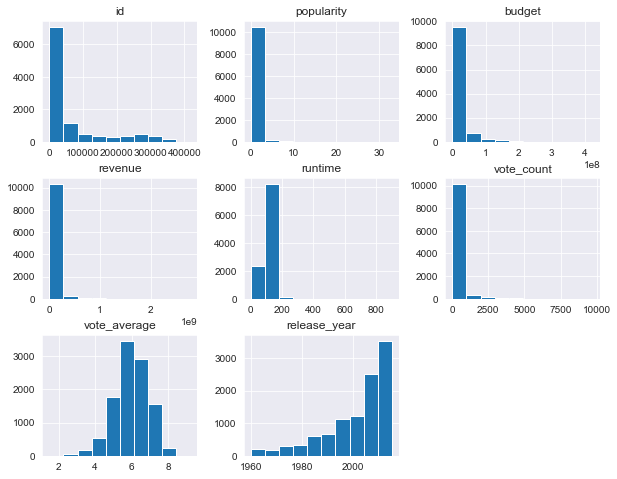

In [575]:
df.hist(figsize=(10,8))